In [58]:
import face_recognition
import cv2
image = face_recognition.load_image_file("/Users/magu/Documents/face_recognition_demo/images/manman.png")

face_locations = face_recognition.face_locations(image)

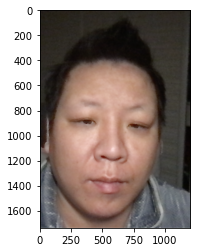

In [59]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

## 识别出人脸的位置

In [60]:
face_locations

[(617, 1043, 1576, 85)]

## 识别128位人脸特征值

In [61]:
face_encodings = face_recognition.face_encodings(image)[0]
face_encodings.shape

(128,)

## 打开摄像头拍摄一张照片

In [62]:
import cv2
video_capture = cv2.VideoCapture(0) 
process_this_frame = True
max_iter = 10
frames = []
n = 0
while n < max_iter:
    n += 1
    ret, frame = video_capture.read()
    # opencv的图像是BGR格式的，而我们需要是的RGB格式的，因此需要进行一个转换。
    # rgb_frame = frame[:, :, ::-1]
    # rgb_face_locations = face_recognition.face_locations(rgb_frame)
    frames.append(frame)

len(frames)

10

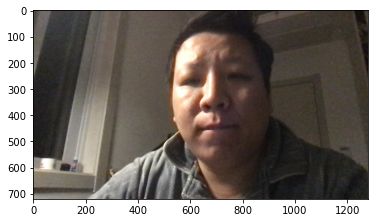

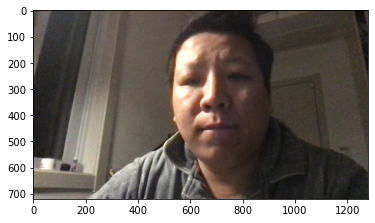

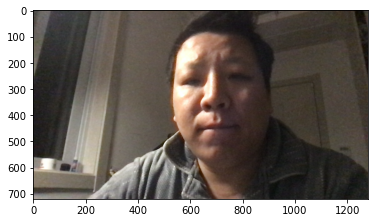

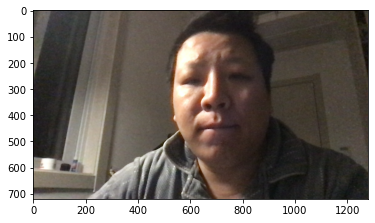

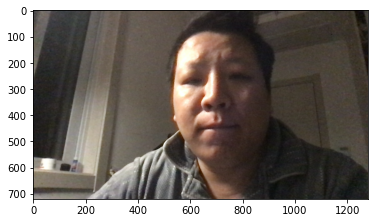

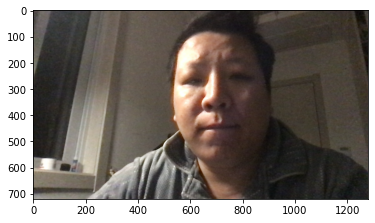

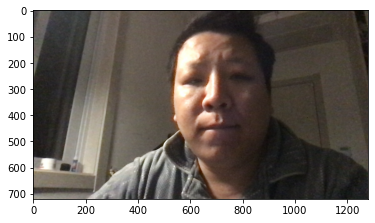

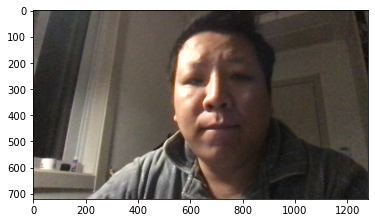

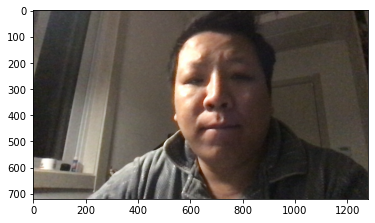

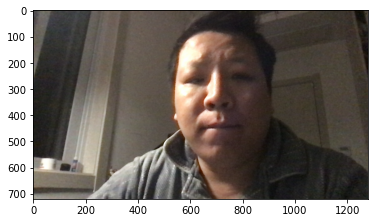

In [63]:
for frame in frames:
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.show()

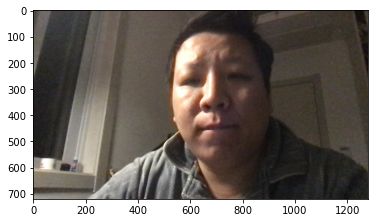

In [64]:
frame = cv2.cvtColor(frames[0],cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

In [65]:
rgb_face_encodings = face_recognition.face_encodings(frame)[0]
results = face_recognition.compare_faces([face_encodings],rgb_face_encodings)
print(results)

[True]


In [68]:
import numpy as np
np.linalg.norm(face_encodings-rgb_face_encodings,axis=0) <= 0.4

True